In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Naive Bayes Calssification (나이브 베이즈 분류기)

*   베이즈 정리를 적용한 확률적 분류 알고리즘
*   모든 features가 독립임을 가정 (naive 가정)
*   입력에 따라 Gaussian naive bayes, Bernoulli naive Bayes, Multinomial Naive Bayes 로 구분된다.

-- Gaussian naive bayes : 변수가 연속형 변수일 경우, 

정규분포를 가정한 표본들을 대상으로 조건부 독립을 나타내, 항상 같은 분모를 갖는 조건하에서 분자의 값이 가장 큰 경우,즉 확률이 가장 높은 경우를 "선택"

-- Bernoulli naive bayes : 변수가 범주형 변수이면서, 클래스가 2개인 경우



-- Multinomial naive bayes : 변수가 범주형 변수일 경우, 




# 나이브 베이즈 분류기의 확률 모델

*   조건부 확률 모델

In [35]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

# 산림 토양 데이터 (분류)

In [20]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()

print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [ ]:
pd.DataFrame(covtype.data, columns = covtype.feature_names)

In [21]:
cov_X = covtype.data
cov_y = covtype.target

X_train, X_test, y_train, y_test = train_test_split(cov_X, cov_y, test_size = 0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(464809, 54)
(464809,)
(116203, 54)
(116203,)


In [11]:
# preprocessing
# 아무튼 전처리 과정을 거치면 됨.

cov_df = pd.DataFrame(covtype.data, columns = covtype.feature_names)
cov_df['target'] = covtype.target

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(X_train_scaled.shape)

(464809, 54)
(464809, 54)


In [27]:
# Gaussian Navie bayes model

model = GaussianNB()
model.fit(X_train_scaled, y_train)

predict = model.predict(X_train_scaled)
train_acc = metrics.accuracy_score(y_train, predict)
train_f1 = metrics.f1_score(y_train, predict, average = None)

print('Train Accuracy : {:.3f}'.format(train_acc))
print('Train F1 score : {}'.format(train_f1))
print()

predict = model.predict(X_test_scaled)
test_acc = metrics.accuracy_score(y_test, predict)
test_f1 = metrics.f1_score(y_test, predict, average = None)

print('Test Accuracy : {:.3f}'.format(test_acc))
print('Test F1 score : {}'.format(test_f1))


Train Accuracy : 0.088
Train F1 score : [0.03995821 0.01792459 0.33477174 0.13688666 0.04339113 0.06932084
 0.23333461]

Test Accuracy : 0.089
Test F1 score : [0.04231797 0.01805592 0.33586041 0.14430088 0.04368586 0.06976744
 0.23464164]


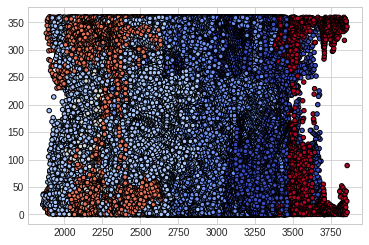

In [32]:
# visualize
plt.scatter(cov_X[:, 0], cov_X[:, 1], c = cov_y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

# 20 Newsgroup data (분류)

In [3]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups()

news_X = newsgroups.data
news_y = newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(news_X, news_y, test_size = 0.3)

In [4]:
# preprocessing

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# 벡터화 
# '문자 데이터'는 '실수 벡터'로 변환해 머신러닝 모델 입력 값으로 변환해야한다. 


# 개별 단어의 수를 카운팅
count_vectorizer = CountVectorizer()    

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


# 개별 단어를 해쉬 값으로 표현, 미리 정해진 크기의 벡터로 표현
hash_vectorizer = HashingVectorizer(n_features = 1000)  

X_train_hash = hash_vectorizer.fit_transform(X_train)
X_test_hash = hash_vectorizer.transform(X_test)


# 문서에서 나온 단어의 빈도 (term frequency, tf)와 역문서 빈도(inverse document freauency, idf)를 곱해서 구함,
# 일반적으로 로그 스케일 후 사용 (너무 빈번하게 나타나는 단어 스케일링 목적)
tfidf_vectorizer = TfidfVectorizer()    

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [7]:
# Bernoulli naive bayes model

model = BernoulliNB()
model.fit(X_train_count, y_train)

print("Count Vector \n")
predict = model.predict(X_train_count)
train_acc = metrics.accuracy_score(y_train, predict)
train_f1 = metrics.f1_score(y_train, predict, average=None)

print('Train Accuracy : {:.3f}'.format(train_acc))
print('Train F1 score : {}'.format(train_f1))
print()

predict = model.predict(X_test_count)
test_acc = metrics.accuracy_score(y_test, predict)
test_f1 = metrics.f1_score(y_test, predict, average=None)

print('Test Accuracy : {:.3f}'.format(test_acc))
print('Test F1 score : {}'.format(test_f1))


Train Accuracy : 0.751
Train F1 score : [0.74153298 0.81632653 0.13302752 0.78271919 0.81593111 0.85060565
 0.54733932 0.87516779 0.94208494 0.80487805 0.9495695  0.89537713
 0.5448592  0.8782936  0.90609137 0.77522936 0.86099865 0.81447964
 0.57336343 0.09386282]

Test Accuracy : 0.624
Test F1 score : [0.49197861 0.56505576 0.07216495 0.58100559 0.68446602 0.69009585
 0.45801527 0.74433657 0.87931034 0.7635468  0.89589905 0.83180428
 0.35483871 0.77887789 0.82828283 0.70415648 0.76124567 0.76124567
 0.38297872 0.01754386]


In [9]:

model = BernoulliNB()
model.fit(X_train_hash, y_train)

print("Hash Vector \n")
predict = model.predict(X_train_hash)
train_acc = metrics.accuracy_score(y_train, predict)
train_f1 = metrics.f1_score(y_train, predict, average=None)

print('Train Accuracy : {:.3f}'.format(train_acc))
print('Train F1 score : {}'.format(train_f1))
print()

predict = model.predict(X_test_hash)
test_acc = metrics.accuracy_score(y_test, predict)
test_f1 = metrics.f1_score(y_test, predict, average=None)

print('Test Accuracy : {:.3f}'.format(test_acc))
print('Test F1 score : {}'.format(test_f1))


Hash Vector 

Train Accuracy : 0.615
Train F1 score : [0.76547231 0.52549889 0.47249191 0.60985353 0.53981386 0.65597668
 0.36943375 0.63535912 0.76202861 0.69126691 0.80325645 0.70959264
 0.57473928 0.69021739 0.63386397 0.75544174 0.72346369 0.59432799
 0.59236641 0.58490566]

Test Accuracy : 0.515
Test F1 score : [0.648      0.45588235 0.40989399 0.50531915 0.4754902  0.58252427
 0.31034483 0.50617284 0.62973761 0.56707317 0.73972603 0.65993266
 0.4119403  0.59574468 0.51908397 0.6627566  0.56028369 0.53465347
 0.48251748 0.3452381 ]


In [10]:
model = BernoulliNB()
model.fit(X_train_tfidf, y_train)

print("Tf-idf Vector \n")
predict = model.predict(X_train_tfidf)
train_acc = metrics.accuracy_score(y_train, predict)
train_f1 = metrics.f1_score(y_train, predict, average=None)

print('Train Accuracy : {:.3f}'.format(train_acc))
print('Train F1 score : {}'.format(train_f1))
print()

predict = model.predict(X_test_tfidf)
test_acc = metrics.accuracy_score(y_test, predict)
test_f1 = metrics.f1_score(y_test, predict, average=None)

print('Test Accuracy : {:.3f}'.format(test_acc))
print('Test F1 score : {}'.format(test_f1))


Tf-idf Vector 

Train Accuracy : 0.751
Train F1 score : [0.74153298 0.81632653 0.13302752 0.78271919 0.81593111 0.85060565
 0.54733932 0.87516779 0.94208494 0.80487805 0.9495695  0.89537713
 0.5448592  0.8782936  0.90609137 0.77522936 0.86099865 0.81447964
 0.57336343 0.09386282]

Test Accuracy : 0.624
Test F1 score : [0.49197861 0.56505576 0.07216495 0.58100559 0.68446602 0.69009585
 0.45801527 0.74433657 0.87931034 0.7635468  0.89589905 0.83180428
 0.35483871 0.77887789 0.82828283 0.70415648 0.76124567 0.76124567
 0.38297872 0.01754386]


In [33]:
# Multinomial naive bayes model

print("Count Vector \n")

model = MultinomialNB()
model.fit(X_train_count, y_train)

predict = model.predict(X_train_count)
train_acc = metrics.accuracy_score(y_train, predict)
train_f1 = metrics.f1_score(y_train, predict, average = None)

print("Train Accuracy : {:.3f}".format(train_acc))
print("Train F1 score : {}".format(train_f1))
print()

predict = model.predict(X_test_count)
test_acc = metrics.accuracy_score(y_test, predict)
test_f1 = metrics.f1_score(y_test, predict, average = None)

print("Test Accuracy : {:.3f}".format(test_acc))
print("Test F1 score : {}".format(test_f1))



Count Vector 

Train Accuracy : 0.925
Train F1 score : [0.96022727 0.92176039 0.26439232 0.82532751 0.975      0.86173633
 0.91688312 0.9723225  0.9825     0.99169632 0.98364486 0.93478261
 0.96162528 0.97818599 0.9837587  0.94252874 0.97007481 0.97610063
 0.96551724 0.83259912]

Test Accuracy : 0.824
Test F1 score : [0.88737201 0.75718016 0.16666667 0.71806167 0.80769231 0.74725275
 0.70422535 0.86082474 0.90909091 0.93215339 0.95454545 0.81012658
 0.80250784 0.9380531  0.94925373 0.86330935 0.89361702 0.92777778
 0.89473684 0.61818182]


In [34]:
print("Tf-idf Vector \n")

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

predict = model.predict(X_train_tfidf)
train_acc = metrics.accuracy_score(y_train, predict)
train_f1 = metrics.f1_score(y_train, predict, average = None)

print("Train Accuracy : {:.3f}".format(train_acc))
print("Train F1 score : {}".format(train_f1))
print()

predict = model.predict(X_test_tfidf)
test_acc = metrics.accuracy_score(y_test, predict)
test_f1 = metrics.f1_score(y_test, predict, average = None)

print("Test Accuracy : {:.3f}".format(test_acc))
print("Test F1 score : {}".format(test_f1))


Tf-idf Vector 

Train Accuracy : 0.928
Train F1 score : [0.8820827  0.9434954  0.96406444 0.92993631 0.97365119 0.96491228
 0.92149292 0.96984318 0.98756219 0.98695136 0.98728324 0.91216931
 0.96759259 0.98126464 0.96885813 0.76923077 0.91273585 0.98232323
 0.84936479 0.40963855]

Test Accuracy : 0.826
Test F1 score : [0.81853282 0.80487805 0.80672269 0.78481013 0.86238532 0.86705202
 0.75585284 0.88713911 0.92631579 0.94827586 0.95238095 0.69565217
 0.8115016  0.94801223 0.94925373 0.69565217 0.83852691 0.94555874
 0.64253394 0.20634921]


# Navie Bayes model visualize

In [38]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

def make_meshgrid(x, y, h = 0.02):
  x_min = x.min() - 0.5
  x_max = x.max() + 0.5
  y_min = y.min() - 0.5
  y_max = y.max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out


In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 1000)

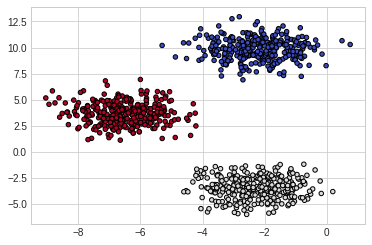

In [40]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

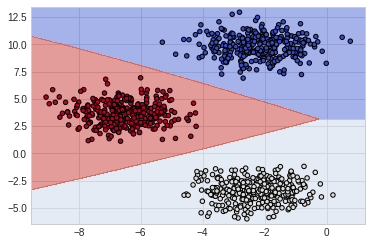

In [41]:
model = GaussianNB()
model.fit(X, y)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

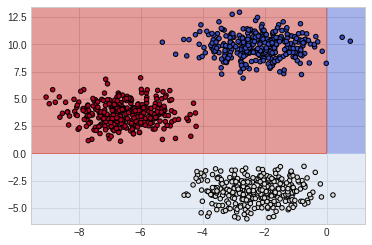

In [42]:
model = BernoulliNB()
model.fit(X, y)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [43]:
scaler = MinMaxScaler()         # Multinomial naive bayes는 음수(nagetive) 값이 입력이 안되기 때문에 minmax scaling을 거침
X = scaler.fit_transform(X)

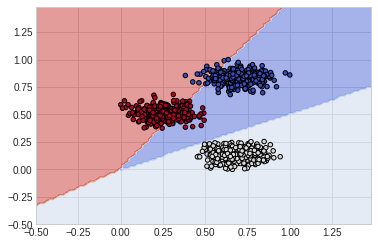

In [44]:
model = MultinomialNB()
model.fit(X, y)

xx, yy = make_meshgrid(X[:, 0], X[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')